## Shelling`s agent-based segregation model, using Manhattan metrics.

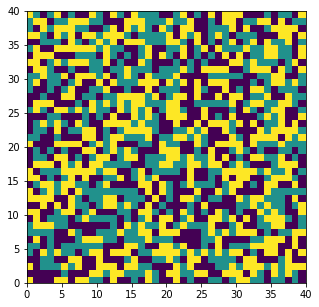

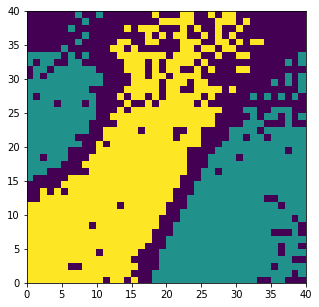


	grid size = 40x40
	population = 1077
	first/second ratio = 1.0
	tolerance = 100%


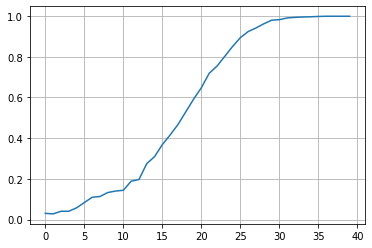

In [1]:
from random import randint, choice
import matplotlib.pyplot as plt


def is_happy(empties, town, size, distance, percent, x_arr, maximum):
    happy = 0
    moved = []
    for x in range(size):
        for y in range(size):
            if not (town[x][y] == 0 or (x, y) in moved):
                nbs = 0
                friendly_neighbours = 0
                for x1 in range(-distance, distance + 1):
                    for y1 in x_arr[:maximum - abs(x1) * 2]:
                        try:
                            if x + x1 < 0 \
                                    or y + y1 < 0 \
                                    or x1 == 0 and y1 == 0 \
                                    or town[x + x1][y + y1] == 0:
                                raise IndexError
                            elif town[x][y] == town[x + x1][y + y1]:
                                friendly_neighbours += 1
                            nbs += 1
                        except IndexError:
                            pass
                try:
                    if friendly_neighbours / nbs < percent:
                        raise ZeroDivisionError
                    else:
                        happy += 1
                except ZeroDivisionError:
                    a1, b1 = choice(empties)
                    empties.remove((a1, b1))
                    empties.append((x, y))
                    town[a1][b1], town[x][y] = town[x][y], town[a1][b1]
                    moved.append((a1, b1))
    return town, happy


def segregation_model(iterations, town=None, size=40, distance=5, percent=0.7):
    if town is None:
        fig, axs = plt.subplots(1, figsize=(5, 5))
        town = [[randint(0, 2) for _ in range(size)] for _ in range(size)]
        axs.pcolormesh(town)
        plt.show()

    inhabitants = tuple(x for z in range(len(town)) for x in town[z])
    first_group = inhabitants.count(1)
    second_group = inhabitants.count(2)
    population = first_group + second_group

    happy = []
    maximum = 2 * distance + 1
    x_a = [str(i) for i in range(-distance, distance + 1)]
    x_a.sort(key=lambda a: abs(int(a)))
    x_arr = tuple(int(q) for q in x_a)

    empties = [(i, j) for i in range(size)
               for j in range(size) if not town[i][j]]

    for _ in range(iterations):
        town, to_ap = is_happy(empties, town, size, distance, percent, x_arr, maximum)
        happy.append(to_ap / population)

    fig, axs = plt.subplots(1, figsize=(5, 5))
    axs.pcolormesh(town)
    plt.show()
    if 1.0 in happy:
        happy = happy[:happy.index(1.0)]
    return f'\n\tgrid size = {size}x{size}\n' \
           f'\tpopulation = {population}\n' \
           f'\tfirst/second ratio = {round(first_group / second_group, ndigits=2)}\n' \
           f'\ttolerance = {round(max(happy) * 100)}%', tuple(enumerate(happy))


if __name__ == '__main__':
    out, x_axis = segregation_model(400)
    print(out)
    plt.plot(tuple(x for x, _ in x_axis), tuple(x for _, x in x_axis))
    plt.grid()
    plt.show()